In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import glob
import cv2
import os
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from sklearn.model_selection import train_test_split
from keras.layers.core import Dense
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import concatenate
import numpy as np
import argparse
import locale
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import RMSprop
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import cohen_kappa_score as kappa_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from skopt import gp_minimize
from skopt.space import Real, Integer
from sklearn.preprocessing import StandardScaler
kappa_scorer = make_scorer(kappa_score)
from keras.constraints import maxnorm
import os
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from keras import backend as K
import glob
import cv2
import os
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from sklearn.model_selection import train_test_split
from keras.layers.core import Dense
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import concatenate
import numpy as np
import argparse
import locale
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import RMSprop
import pandas as pd
import tensorflow as tf
from keras import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.constraints import maxnorm
from keras.layers import Dropout, Dense, np
from keras.optimizers import SGD
from keras.utils import to_categorical
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
import glob
import json

Using TensorFlow backend.


In [2]:
def discrelabel(length, mask, label):
    a = np.zeros (length+mask*2);
    for i in range(2*mask):
        a[int(label*length)+i] = (- mask + i)*0.01
    for i in range(100):
        if int(label*length)-i > 0:
            a[int(label*length)-i] = 10
        if int(label*length)+2*mask+i < length+mask*2:
            a[int(label*length)+2*mask+i] = 10
#     a=tuple(a.reshape(1, -1)[0])
    return a
def discrelabel_same(length, mask, label):
    a = np.zeros (length+mask*2);
    for i in range(len(a)):
        a[i]= label;
#     for i in range(2*mask):
#         a[int(label*length)+i] = label
#     for i in range(100):
#         if int(label*length)-i > 0:
#             a[int(label*length)-i] = 10
#         if int(label*length)+2*mask+i < length+mask*2:
#             a[int(label*length)+2*mask+i] = 10
#     a=tuple(a.reshape(1, -1)[0])
    return a
def discreMask(length, mask, label):
    a = np.ones (length+mask*2);
    for i in range(100):
        if int(label*length)-i > 0:
            a[int(label*length)-i] = 0
        if int(label*length)+2*mask+i < length+mask*2:
            a[int(label*length)+2*mask+i] = 0
#     a=tuple(a.reshape(1, -1)[0])
    return a

def discrelabel_outer(length, mask, label):
    a = np.zeros (length+mask*2);
    for i in range(2*mask):
        a[int(label*length)+i] = np.tanh((- mask + i)*0.01)*2
    for i in range(100):
        if int(label*length)-i > 0:
            a[int(label*length)-i] = 10
        if int(label*length)+2*mask+i < length+mask*2:
            a[int(label*length)+2*mask+i] = 10
#     a=tuple(a.reshape(1, -1)[0])
    return a

def discrelabel_inner(length, mask, label):
    a = np.zeros (length+mask*2);
    for i in range(mask):
        a[int(label*length)+mask-i] = -np.exp(np.tanh((mask)*0.01))+np.exp(np.tanh((mask-i)*0.01))
    for i in range(mask):
        a[int(label*length)+mask+i] = np.exp(np.tanh((mask)*0.01))-np.exp(np.tanh((mask-i)*0.01))
    for i in range(100):
        if int(label*length)-i > 0:
            a[int(label*length)-i] = 10
        if int(label*length)+2*mask+i < length+mask*2:
            a[int(label*length)+2*mask+i] = 10
#     a=tuple(a.reshape(1, -1)[0])
    return a
def guassianMean(data):
    y = voting(data)
    x = np.linspace(0, 1600, len(y))
    init_vals = [10., 640., 16000.]
    #Define the optimized values of parameters
    try:
        best_vals, covar = curve_fit(gaussian, x, y, p0=init_vals)
    #Plot the curve with initial parameters and optimized parameters
        y1 = gaussian(x, *best_vals) #best_vals, '*'is used to read-out the values in the array
    except:
        y1 = y
    return y1
import operator
def Normalization(x):
    return [(float(i)-min(x))/float(max(x)-min(x)) for i in x]
def NormalizationToNeg(x):
    return [(float(i)-np.mean(x))/float(max(x)-min(x)) for i in x]
from keras import backend as K
# K.tf.enable_eager_execution()
def seq2seq_loss(y_true, y_pred):
    trade_index = K.tf.not_equal(y_true, 10 )
    y_true_tradeable = K.tf.boolean_mask(y_true, trade_index)
    y_pred_tradeable = K.tf.boolean_mask(y_pred, trade_index)
#     dataMask = np.zeros(len(dataValue))
#     for i in range(len(dataValue)-1):
#         if abs(dataValue[i]-dataValue[i+1])>0 and abs(dataValue[i-1]-dataValue[i])>0 :
#             dataMask[i]=1
#     vMask = K.convert_to_tensor(dataMask)
#     y_pred = y_pred*vMask;
    return K.mean(K.square(y_pred_tradeable-y_true_tradeable),axis=-1)

In [11]:
len(df)

21605

In [3]:
df = pd.read_csv("kc_house_data.csv")
# determine (1) the unique zip codes and (2) the number of data
# points with each zip code
zipcodes = df["zipcode"].value_counts().keys().tolist()
counts = df["zipcode"].value_counts().tolist()
maxPrice = df["price"].max()
df["price"] = (df["price"] / (maxPrice*0.6)).round(2)#0.6
df['convertPrice'] = [discrelabel(1000,300,0)]*len(df)
df["convertPrice_outer"] = [discrelabel(1000,300,0)]*len(df)
df["convertPrice_inner"] = [discrelabel(1000,300,0)]*len(df)
df["convertPrice_same"] = [discrelabel(1000,300,0)]*len(df)
df['mask'] = [discreMask(1000,300,0)]*len(df)
for i in range(df.index.max()):
    if (df.at[i,'price']<0 or df.at[i,'price']>1 or math.isnan(df.at[i,'price'])):
        print('delect %s column abnormal data'%i);
        df.drop([i],inplace=True)
    else:
        df.at[i,'convertPrice'] = discrelabel(1000,300,df.at[i,'price'])
        df.at[i,'convertPrice_outer'] = discrelabel_outer(1000,300,df.at[i,'price'])
        df.at[i,'convertPrice_inner'] = discrelabel_inner(1000,300,df.at[i,'price'])
        df.at[i,'convertPrice_same'] = discrelabel_same(1000,300,df.at[i,'price'])
        df.at[i,'mask'] = discreMask(1000,300,df.at[i,'price'])

delect 1164 column abnormal data
delect 1315 column abnormal data
delect 1448 column abnormal data
delect 3914 column abnormal data
delect 4411 column abnormal data
delect 7252 column abnormal data
delect 8092 column abnormal data
delect 9254 column abnormal data


In [4]:
# for (zipcode, count) in zip(zipcodes, counts):
# # the zip code counts for our housing dataset is *extremely*
# # unbalanced (some only having 1 or 2 houses per zip code)
# # so let's sanitize our data by removing any houses with less
# # than 25 houses per zip code
#     if count < 25:
#         idxs = df[df["zipcode"] == zipcode].index
#         df.drop(idxs, inplace=True)

In [5]:
split = train_test_split(df, test_size=0.4, random_state=42)#0.4,42
(trainAttrX, testAttrX) = split

In [6]:
trainY = (trainAttrX["price"])
testY = (testAttrX["price"])
trainY1 = (trainAttrX["convertPrice"])
testY1 = (testAttrX["convertPrice"])
trainY2 = (trainAttrX["convertPrice_outer"])
testY2 = (testAttrX["convertPrice_outer"])
trainY3 = (trainAttrX["convertPrice_inner"])
testY3 = (testAttrX["convertPrice_inner"])
trainY4 = (trainAttrX["convertPrice_same"])
testY4 = (testAttrX["convertPrice_same"])
trainMask = (trainAttrX["mask"])
testMask = (testAttrX["mask"])

In [7]:
continuous = ["bedrooms", "bathrooms", "sqft_lot","sqft_living","sqft_above","lat","long","sqft_lot15","sqft_living15",]
# performin min-max scaling each continuous feature column to
# the range [0, 1]
cs = MinMaxScaler()
trainContinuous = cs.fit_transform(trainAttrX[continuous])
testContinuous = cs.fit_transform(testAttrX[continuous])        
    
zipBinarizer = LabelBinarizer().fit(df["zipcode"])
trainCategorical = zipBinarizer.transform(trainAttrX["zipcode"])
testCategorical = zipBinarizer.transform(testAttrX["zipcode"])
# construct our training and testing data points by concatenating
# the categorical features with the continuous features
trainX = np.hstack([trainCategorical, trainContinuous])
testX = np.hstack([testCategorical, testContinuous])
print(np.asarray(trainX).shape)
def transf(Data):
    test = Data.as_matrix()
    res = []
    for i in range(len(test)):
        res.append(test[i])
    res = np.asarray(res)
    return res
trainY1 = transf(trainY1)
testY1 = transf(testY1)
trainY2 = transf(trainY2)
testY2 = transf(testY2)
trainY3 = transf(trainY3)
testY3 = transf(testY3)
trainY4 = transf(trainY4)
testY4 = transf(testY4)
trainMask = transf(trainMask)
testMask = transf(testMask)

/Users/zekunzhao/venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/zekunzhao/venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/zekunzhao/venv/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


(12963, 79)


In [12]:
model = Sequential([
    Dense(512, input_dim=trainX.shape[1]),
    Activation('sigmoid'),
    Dense(512),
    Activation('sigmoid'),
    Dense(512),
    Activation('sigmoid'),
    Dense(1)
])
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss='mse', optimizer=opt)

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=8, verbose=1)
model_checkpoint = ModelCheckpoint(filepath='mse_ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5',
                                                   monitor='val_loss',
                                                   verbose=1,
                                                   save_best_only=True,
                                                   save_weights_only=True,
                                                   period=1)
# train the model
print("[INFO] training model...")
model.fit(
	trainX, trainY,
	validation_data=(testX, testY),
	epochs=10, batch_size=20,callbacks=[early_stopping, model_checkpoint])

[INFO] training model...
Train on 12963 samples, validate on 8642 samples
Epoch 1/10
12963/12963 [==============================] - 5s 359us/step - loss: 0.0221 - val_loss: 0.0045

Epoch 00001: val_loss improved from inf to 0.00452, saving model to mse_ep001-loss0.022-val_loss0.005.h5
Epoch 2/10
12963/12963 [==============================] - 4s 315us/step - loss: 0.0024 - val_loss: 0.0026

Epoch 00002: val_loss improved from 0.00452 to 0.00261, saving model to mse_ep002-loss0.002-val_loss0.003.h5
Epoch 3/10
12963/12963 [==============================] - 4s 287us/step - loss: 0.0024 - val_loss: 0.0020

Epoch 00003: val_loss improved from 0.00261 to 0.00198, saving model to mse_ep003-loss0.002-val_loss0.002.h5
Epoch 4/10
12963/12963 [==============================] - 4s 319us/step - loss: 0.0020 - val_loss: 0.0019

Epoch 00004: val_loss improved from 0.00198 to 0.00188, saving model to mse_ep004-loss0.002-val_loss0.002.h5
Epoch 5/10
12963/12963 [==============================] - 4s 297us

[INFO] predicting house prices...


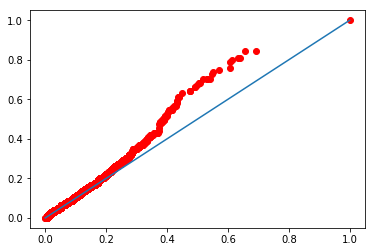

0.08421052631578949
[0.07236413]


In [13]:
print("[INFO] predicting house prices...")
preds = model.predict(testX)
test = preds
res = []
for i in range(len(test)):
    res.append(np.asarray(test[i]))
res = Normalization(res)
testY = Normalization(testY)
res.sort()
# plt.plot(res)
plt.plot(res,np.sort(np.asarray(testY)),'ro')

x = np.linspace(0, 1, 1000)
y=x
plt.plot(x,y)
plt.show()
print(testY[5])
print(preds[5])

In [8]:
model = Sequential([
    Dense(512, input_dim=trainX.shape[1]),
    Activation('sigmoid'),
    Dense(512),
    Activation('sigmoid'),
    Dense(512),
    Activation('sigmoid'),
    Dense(1600)
])

/Users/zekunzhao/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [12]:
model_checkpoint = ModelCheckpoint(filepath='convert_ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5',
                                                   monitor='val_loss',
                                                   verbose=1,
                                                   save_best_only=True,
                                                   save_weights_only=True,
                                                   period=1)
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss=seq2seq_loss, optimizer=opt)
# train the model
print("[INFO] training model...")

model.fit(
	trainX, trainY1,
	validation_data=(testX, testY1),
	epochs=10, batch_size=20,callbacks=[early_stopping, model_checkpoint])

[INFO] training model...


/Users/zekunzhao/venv/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 12963 samples, validate on 8642 samples
Epoch 1/10
12963/12963 [==============================] - 12s 900us/step - loss: 0.2105 - val_loss: 0.1049

Epoch 00001: val_loss improved from inf to 0.10487, saving model to convert_ep001-loss0.210-val_loss0.105.h5
Epoch 2/10
12963/12963 [==============================] - 11s 857us/step - loss: 0.0824 - val_loss: 0.0970

Epoch 00002: val_loss improved from 0.10487 to 0.09695, saving model to convert_ep002-loss0.082-val_loss0.097.h5
Epoch 3/10
12963/12963 [==============================] - 11s 858us/step - loss: 0.0704 - val_loss: 0.0826

Epoch 00003: val_loss improved from 0.09695 to 0.08261, saving model to convert_ep003-loss0.070-val_loss0.083.h5
Epoch 4/10
12963/12963 [==============================] - 11s 881us/step - loss: 0.0666 - val_loss: 0.0822

Epoch 00004: val_loss improved from 0.08261 to 0.08215, saving model to convert_ep004-loss0.067-val_loss0.082.h5
Epoch 5/10
12963/12963 [==============================] - 11s 844us/ste

In [13]:
preds = model.predict(testX)

In [9]:
def voting(data):
    predsAns = np.zeros(len(data))
    for i in range(len(data)):
        if (i-int(data[i]*100))< len(data) and (i-int(data[i]*100)) >0:
            predsAns[i-int(data[i]*100)]=predsAns[i-int(data[i]*100)] + 1
    for i in range(len(predsAns)):
        if predsAns[i] == 1:
            predsAns[i] = 0;
    return predsAns
def voting2(data):
    data = np.arctanh(data)
    data = data[~np.isnan(data)]
    predsAns = np.zeros(len(data))
    for i in range(len(data)):
        if (i-int(data[i]*100))< len(data) and (i-int(data[i]*100)) >0:
            predsAns[i-int(data[i]*100)]=predsAns[i-int(data[i]*100)] + 1
    for i in range(len(predsAns)):
        if predsAns[i] == 1:
            predsAns[i] = 0;
    return predsAns


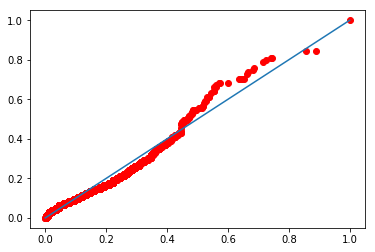

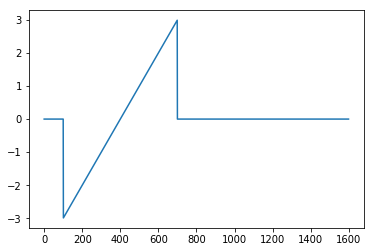

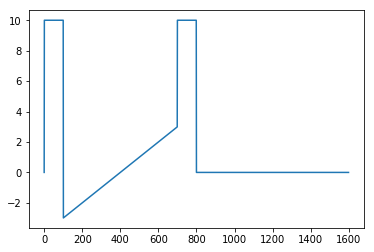

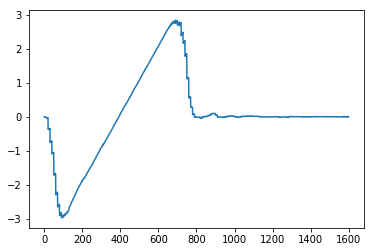

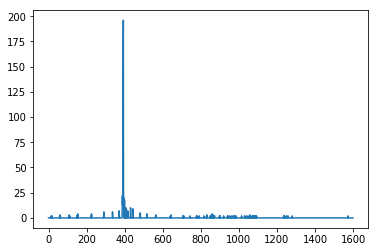

In [15]:
testAns = []
testTrue =[]
testT = testY1*testMask
for i in range(len(testX)):
    temp0 = voting(preds[i])
    index, value = max(enumerate(temp0), key=operator.itemgetter(1))
    testAns.append(index)
    temp1 = voting(testT[i])
    index, value = max(enumerate(temp1), key=operator.itemgetter(1))
    testTrue.append(index)
testAns = Normalization(testAns)
testTrue = Normalization(testTrue)
plt.plot(np.sort(testAns),np.sort(testTrue),'ro')
x = np.linspace(0, 1, 1000)
y=x
plt.plot(x,y)
plt.show()
plt.plot(testT[5])
plt.show()
plt.plot(testY1[5])
plt.show()
plt.plot(preds[5])
plt.show()
plt.plot(voting(preds[5]))
plt.show()

In [16]:
model_checkpoint = ModelCheckpoint(filepath='outer_ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5',
                                                   monitor='val_loss',
                                                   verbose=1,
                                                   save_best_only=True,
                                                   save_weights_only=True,
                                                   period=1)
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss=seq2seq_loss, optimizer=opt)
# train the model
print("[INFO] training model...")

model.fit(
	trainX, trainY2,
	validation_data=(testX, testY2),
	epochs=10, batch_size=20,callbacks=[early_stopping, model_checkpoint])

[INFO] training model...
Train on 12963 samples, validate on 8642 samples
Epoch 1/10
12963/12963 [==============================] - 14s 1ms/step - loss: 0.0477 - val_loss: 0.0471

Epoch 00001: val_loss improved from inf to 0.04712, saving model to outer_ep001-loss0.048-val_loss0.047.h5
Epoch 2/10
12963/12963 [==============================] - 13s 1ms/step - loss: 0.0469 - val_loss: 0.0693

Epoch 00002: val_loss did not improve from 0.04712
Epoch 3/10
12963/12963 [==============================] - 11s 879us/step - loss: 0.0463 - val_loss: 0.0533

Epoch 00003: val_loss did not improve from 0.04712
Epoch 4/10
12963/12963 [==============================] - 12s 908us/step - loss: 0.0462 - val_loss: 0.0564

Epoch 00004: val_loss did not improve from 0.04712
Epoch 5/10
12963/12963 [==============================] - 13s 1ms/step - loss: 0.0461 - val_loss: 0.0568

Epoch 00005: val_loss did not improve from 0.04712
Epoch 6/10
12963/12963 [==============================] - 12s 896us/step - loss: 

In [107]:
value = discrelabel_outer(1000,300,df.at[10,'price'])

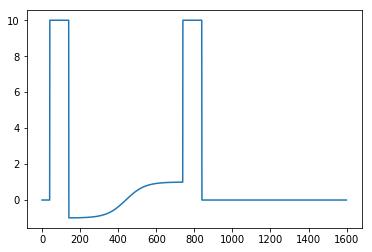

In [108]:
plt.plot(value)

In [109]:
ttt =  voting(value)

In [111]:
index, value = max(enumerate(ttt), key=operator.itemgetter(1))

In [112]:
index

439

In [167]:
def discrelabel_inner(length, mask, label):
    a = np.zeros (length+mask*2);
    for i in range(mask):
        a[int(label*length)+mask-i] = -np.exp(np.tanh((mask)*0.01))+np.exp(np.tanh((mask-i)*0.01))
    for i in range(mask):
        a[int(label*length)+mask+i] = np.exp(np.tanh((mask)*0.01))-np.exp(np.tanh((mask-i)*0.01))
    for i in range(100):
        if int(label*length)-i > 0:
            a[int(label*length)-i] = 10
        if int(label*length)+2*mask+i < length+mask*2:
            a[int(label*length)+2*mask+i] = 10
#     a=tuple(a.reshape(1, -1)[0])
    return a

In [168]:
value = discrelabel_inner(1000,300,df.at[10,'price'])

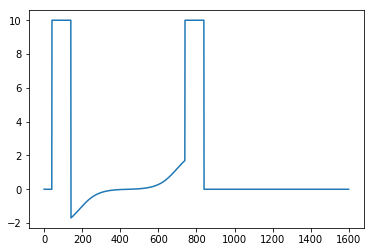

In [169]:
plt.plot(value)

/Users/zekunzhao/venv/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
/Users/zekunzhao/venv/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in multiply
  if __name__ == '__main__':


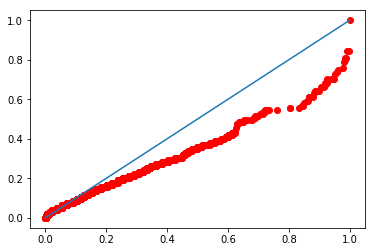

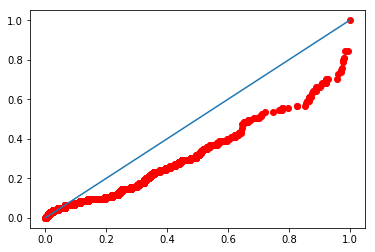

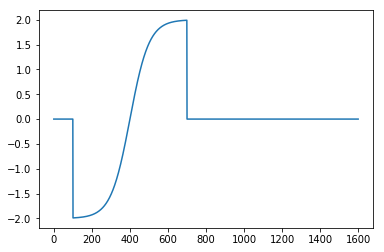

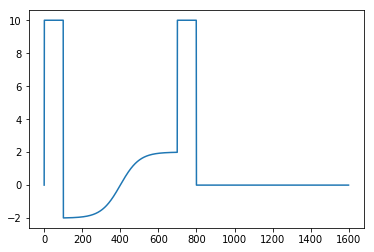

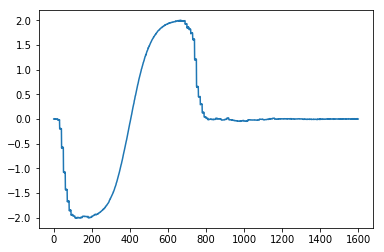

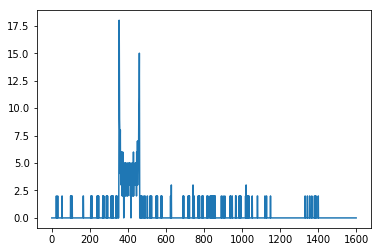

In [172]:
model.load_weights('outer_ep001-loss0.048-val_loss0.047.h5')
preds = model.predict(testX)
testAns1 = []
testAns = []
testTrue =[]
testT = testY2*testMask
for i in range(len(testX)):
    temp0 = voting(preds[i])
    index, value = max(enumerate(temp0), key=operator.itemgetter(1))
    testAns.append(index)
    index, value = max(enumerate(guassianMean(preds[i])), key=operator.itemgetter(1))
    testAns1.append(index)
    temp1 = voting(testT[i])
    index, value = max(enumerate(temp1), key=operator.itemgetter(1))
    testTrue.append(index)
testAns = Normalization(testAns)
testAns1 = Normalization(testAns1)
testTrue = Normalization(testTrue)
plt.plot(np.sort(testAns1),np.sort(testTrue),'ro')
x = np.linspace(0, 1, 1000)
y=x
plt.plot(x,y)
plt.show()
plt.plot(np.sort(testAns),np.sort(testTrue),'ro')
x = np.linspace(0, 1, 1000)
y=x
plt.plot(x,y)
plt.show()
plt.plot(testT[5])
plt.show()
plt.plot(testY2[5])
plt.show()
plt.plot(preds[5])
plt.show()
plt.plot(voting(preds[5]))
plt.show()

In [18]:
model_checkpoint = ModelCheckpoint(filepath='inner_ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5',
                                                   monitor='val_loss',
                                                   verbose=1,
                                                   save_best_only=True,
                                                   save_weights_only=True,
                                                   period=1)
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss=seq2seq_loss, optimizer=opt)
# train the model
print("[INFO] training model...")

model.fit(
	trainX, trainY3,
	validation_data=(testX, testY3),
	epochs=10, batch_size=20,callbacks=[early_stopping, model_checkpoint])

[INFO] training model...
Train on 12963 samples, validate on 8642 samples
Epoch 1/10
12963/12963 [==============================] - 13s 1ms/step - loss: 0.0266 - val_loss: 0.0207

Epoch 00001: val_loss improved from inf to 0.02067, saving model to inner_ep001-loss0.027-val_loss0.021.h5
Epoch 2/10
12963/12963 [==============================] - 14s 1ms/step - loss: 0.0160 - val_loss: 0.0213

Epoch 00002: val_loss did not improve from 0.02067
Epoch 3/10
12963/12963 [==============================] - 12s 958us/step - loss: 0.0160 - val_loss: 0.0230

Epoch 00003: val_loss did not improve from 0.02067
Epoch 4/10
12963/12963 [==============================] - 12s 927us/step - loss: 0.0158 - val_loss: 0.0229

Epoch 00004: val_loss did not improve from 0.02067
Epoch 5/10
12963/12963 [==============================] - 12s 960us/step - loss: 0.0158 - val_loss: 0.0249

Epoch 00005: val_loss did not improve from 0.02067
Epoch 6/10
12963/12963 [==============================] - 13s 965us/step - loss

/Users/zekunzhao/venv/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
/Users/zekunzhao/venv/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in multiply
  if __name__ == '__main__':


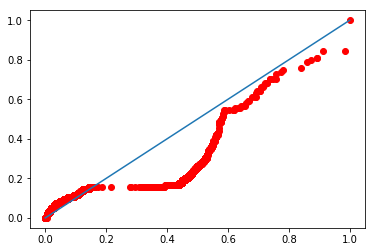

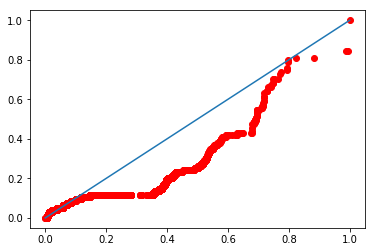

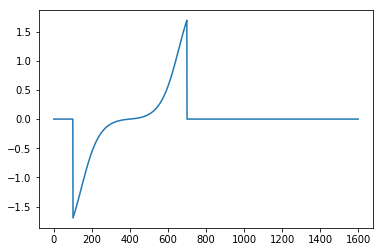

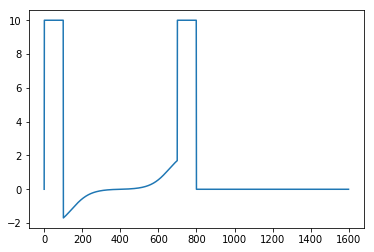

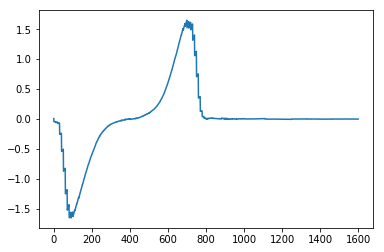

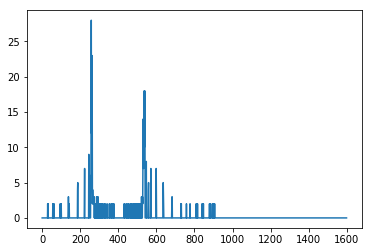

In [149]:
preds = model.predict(testX)
testAns1 = []
testAns = []
testTrue =[]
testT = testY3*testMask
for i in range(len(testX)):
    temp0 = voting(preds[i])
    index, value = max(enumerate(temp0), key=operator.itemgetter(1))
    testAns.append(index)
    index, value = max(enumerate(guassianMean(preds[i])), key=operator.itemgetter(1))
    testAns1.append(index)
    temp1 = voting(testT[i])
    index, value = max(enumerate(temp1), key=operator.itemgetter(1))
    testTrue.append(index)
testAns = Normalization(testAns)
testAns1 = Normalization(testAns1)
testTrue = Normalization(testTrue)
plt.plot(np.sort(testAns1),np.sort(testTrue),'ro')
x = np.linspace(0, 1, 1000)
y=x
plt.plot(x,y)
plt.show()
plt.plot(np.sort(testAns),np.sort(testTrue),'ro')
x = np.linspace(0, 1, 1000)
y=x
plt.plot(x,y)
plt.show()
plt.plot(testT[5])
plt.show()
plt.plot(testY3[5])
plt.show()
plt.plot(preds[5])
plt.show()
plt.plot(voting(preds[5]))
plt.show()

In [10]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=8, verbose=1)
model_checkpoint = ModelCheckpoint(filepath='same_ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5',
                                                   monitor='val_loss',
                                                   verbose=1,
                                                   save_best_only=True,
                                                   save_weights_only=True,
                                                   period=1)
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss=seq2seq_loss, optimizer=opt)
# train the model
print("[INFO] training model...")

model.fit(
	trainX, trainY4,
	validation_data=(testX, testY4),
	epochs=10, batch_size=20,callbacks=[early_stopping, model_checkpoint])
preds = model.predict(testX)
testAns1 = []
testAns = []
testTrue =[]
testT = testY4*testMask


[INFO] training model...


/Users/zekunzhao/venv/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 12963 samples, validate on 8642 samples
Epoch 1/10
12963/12963 [==============================] - 11s 828us/step - loss: 0.0045 - val_loss: 0.0019

Epoch 00001: val_loss improved from inf to 0.00190, saving model to same_ep001-loss0.004-val_loss0.002.h5
Epoch 2/10
12963/12963 [==============================] - 10s 788us/step - loss: 0.0016 - val_loss: 0.0040

Epoch 00002: val_loss did not improve from 0.00190
Epoch 3/10
12963/12963 [==============================] - 10s 782us/step - loss: 0.0017 - val_loss: 0.0038

Epoch 00003: val_loss did not improve from 0.00190
Epoch 4/10
12963/12963 [==============================] - 10s 790us/step - loss: 0.0016 - val_loss: 0.0015

Epoch 00004: val_loss improved from 0.00190 to 0.00149, saving model to same_ep004-loss0.002-val_loss0.001.h5
Epoch 5/10
12963/12963 [==============================] - 12s 891us/step - loss: 0.0015 - val_loss: 0.0018

Epoch 00005: val_loss did not improve from 0.00149
Epoch 6/10
12963/12963 [==================

In [11]:
preds = model.predict(testX)
for i in range(len(testX)):
    temp0 = voting(preds[i])
    index, value = max(enumerate(temp0), key=operator.itemgetter(1))
    testAns.append(index)
    index, value = max(enumerate(guassianMean(preds[i])), key=operator.itemgetter(1))
    testAns1.append(index)
    temp1 = voting(testT[i])
    index, value = max(enumerate(temp1), key=operator.itemgetter(1))
    testTrue.append(index)

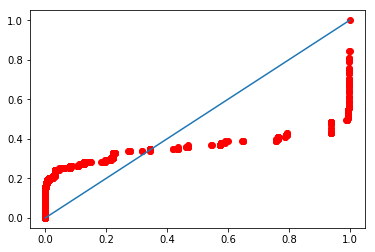

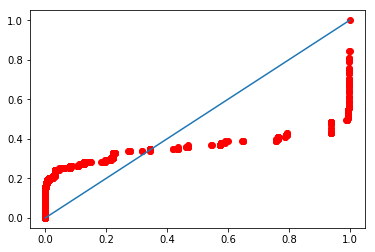

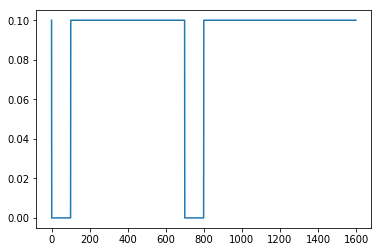

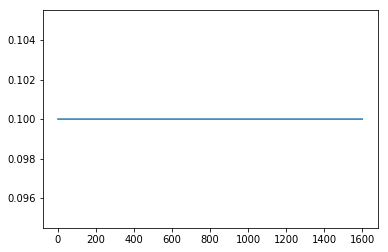

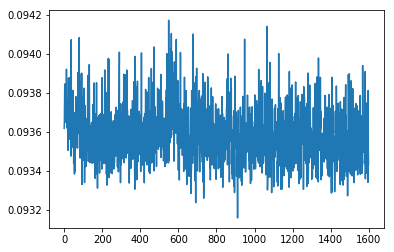

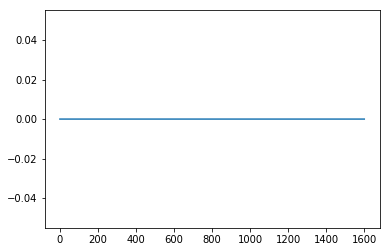

In [12]:
testAns = Normalization(testAns)
testAns1 = Normalization(testAns1)
testTrue = Normalization(testTrue)
plt.plot(np.sort(testAns1),np.sort(testTrue),'ro')
x = np.linspace(0, 1, 1000)
y=x
plt.plot(x,y)
plt.show()
plt.plot(np.sort(testAns),np.sort(testTrue),'ro')
x = np.linspace(0, 1, 1000)
y=x
plt.plot(x,y)
plt.show()
plt.plot(testT[5])
plt.show()
plt.plot(testY4[5])
plt.show()
plt.plot(preds[5])
plt.show()
plt.plot(voting(preds[5]))
plt.show()

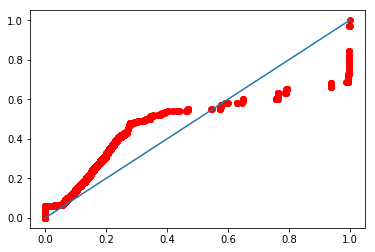

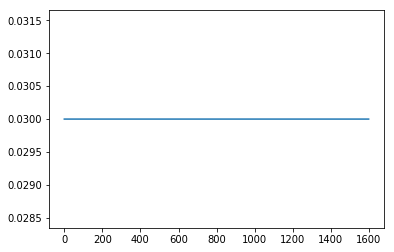

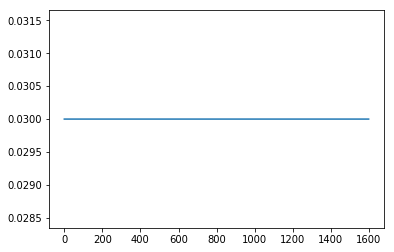

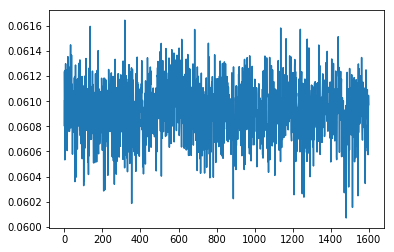

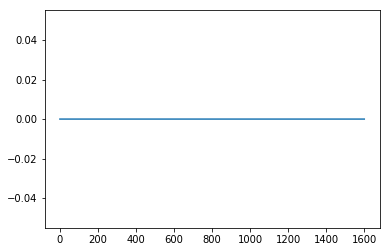

In [18]:
for i in range(len(testX)):
    temp0 = np.mean(preds[i])
    testAns.append(temp0)
    temp1 = np.mean(testY4[i])
    testTrue.append(temp1)
testAns = Normalization(testAns)
testTrue = Normalization(testTrue)
plt.plot(np.sort(testAns),np.sort(testTrue),'ro')
x = np.linspace(0, 1, 1000)
y=x
plt.plot(x,y)
plt.show()
plt.plot(testY4[50])
plt.show()
plt.plot(testY4[50])
plt.show()
plt.plot(preds[50])
plt.show()
plt.plot(voting(preds[50]))
plt.show()

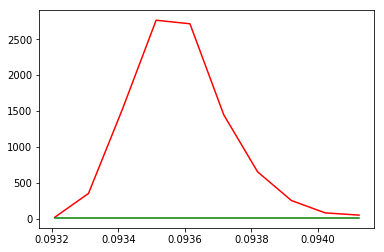

In [16]:
import numpy
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define some test data which is close to Gaussian
data = preds[5]

hist, bin_edges = numpy.histogram(data, density=True)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

# Define model function to be used to fit to the data above:
# Adapt it to as many gaussians you may want
# by copying the function with different A2,mu2,sigma2 parameters
def gauss(x, *p):
    A, mu, sigma = p
    return A*numpy.exp(-(x-mu)**2/(2.*sigma**2))

# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
p0 = [10., 0.05, 10.]

coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)

# Get the fitted curve
hist_fit = gauss(bin_centres, *coeff)

plt.plot(bin_centres, hist, label='Test data',color = 'red')
plt.plot(bin_centres, hist_fit, label='Fitted data',color ='green')

# Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
# print 'Fitted mean = ', coeff[1]
# print 'Fitted standard deviation = ', coeff[2]

plt.show()

[   4.63581427  460.2876798  4360.67928288]


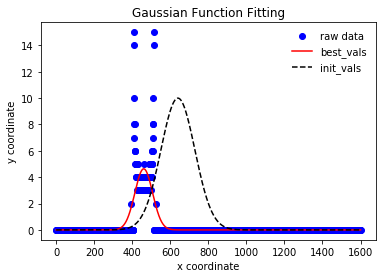

In [139]:
 #Header
import numpy 
import matplotlib.pyplot as plt
from numpy import exp, linspace, random
from scipy.optimize import curve_fit

#Define the Gaussian function
def gaussian(x, amp, cen, wid):
    return amp * exp(-(x-cen)**2 / wid)

def gaussian2(x, *p):
    A1, mu1, sigma1, A2, mu2, sigma2 = p
    return A1*numpy.exp(-(x-mu1)**2/(2.*sigma1**2)) + A2*numpy.exp(-(x-mu2)**2/(2.*sigma2**2))

#Create the data to be fitted

y = voting(testY2[89])
x = linspace(0, 1600, len(y))
# y = gaussian(x, 2.33, 2.21, 1.51) + random.normal(0, 0.2, len(x))+ gaussian(x, 3, -2.41, 1)
# np.savetxt ('data.dat',[x,y])  #[x,y] is is saved as a matrix of 2 lines

#Set the initial(init) values of parameters need to optimize(best)
init_vals = [10., -400., 10.,10., -500, 10.] # for [amp, cen, wid]
init_vals = [10., 640., 16000.]
#Define the optimized values of parameters
best_vals, covar = curve_fit(gaussian, x, y, p0=init_vals)
print(best_vals) # output: array [2.27317256  0.20682276  1.64512305]

#Plot the curve with initial parameters and optimized parameters
y1 = gaussian(x, *best_vals) #best_vals, '*'is used to read-out the values in the array
y2 = gaussian(x, *init_vals) #init_vals


# y1 = gaussian2(x, *best_vals)
# y2 = gauss(x, *pg2)

plt.plot(x, y, 'bo',label='raw data')
plt.plot(x, y1, 'r-',label='best_vals')
plt.plot(x, y2, 'k--',label='init_vals')
#plt.show()

#Labels
plt.title("Gaussian Function Fitting")
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.legend()
leg = plt.legend()  # remove the frame of Legend, personal choice
leg.get_frame().set_linewidth(0.0) # remove the frame of Legend, personal choice
#leg.get_frame().set_edgecolor('b') # change the color of Legend frame
plt.show()

#Export figure
#plt.savefig('fit2.eps', format='eps', dpi=1000)
# plt.savefig('fit2.pdf', format='pdf', dpi=1000, figsize=(8, 6), facecolor='w', edgecolor='k')
# plt.savefig('fit2.jpg', format='jpg', dpi=1000, figsize=(8, 6), facecolor='w', edgecolor='k')

/Users/zekunzhao/venv/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in arctanh
  # This is added back by InteractiveShellApp.init_path()


[  11.87798089 -297.93654794    1.4802119     5.21954651 -599.34006186
   10.19475565]


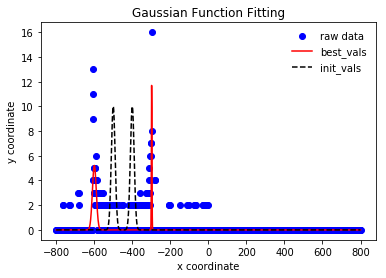

In [133]:
 #Header
import numpy 
import matplotlib.pyplot as plt
from numpy import exp, linspace, random
from scipy.optimize import curve_fit

#Define the Gaussian function
def gaussian(x, amp, cen, wid):
    return amp * exp(-(x-cen)**2 / wid)

def gaussian2(x, *p):
    A1, mu1, sigma1, A2, mu2, sigma2 = p
    return A1*numpy.exp(-(x-mu1)**2/(2.*sigma1**2)) + A2*numpy.exp(-(x-mu2)**2/(2.*sigma2**2))

#Create the data to be fitted
y = voting2(preds[5])
x = linspace(-800, 800, len(y))

# y = gaussian(x, 2.33, 2.21, 1.51) + random.normal(0, 0.2, len(x))+ gaussian(x, 3, -2.41, 1)
# np.savetxt ('data.dat',[x,y])  #[x,y] is is saved as a matrix of 2 lines

#Set the initial(init) values of parameters need to optimize(best)
init_vals = [10., -400., 10.,10., -500, 10.] # for [amp, cen, wid]

#Define the optimized values of parameters
best_vals, covar = curve_fit(gaussian2, x, y, p0=init_vals)
print(best_vals) # output: array [2.27317256  0.20682276  1.64512305]

#Plot the curve with initial parameters and optimized parameters
y1 = gaussian2(x, *best_vals) #best_vals, '*'is used to read-out the values in the array
y2 = gaussian2(x, *init_vals) #init_vals


# y1 = gaussian2(x, *best_vals)
# y2 = gauss(x, *pg2)

plt.plot(x, y, 'bo',label='raw data')
plt.plot(x, y1, 'r-',label='best_vals')
plt.plot(x, y2, 'k--',label='init_vals')
#plt.show()

#Labels
plt.title("Gaussian Function Fitting")
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.legend()
leg = plt.legend()  # remove the frame of Legend, personal choice
leg.get_frame().set_linewidth(0.0) # remove the frame of Legend, personal choice
#leg.get_frame().set_edgecolor('b') # change the color of Legend frame
plt.show()

#Export figure
#plt.savefig('fit2.eps', format='eps', dpi=1000)
# plt.savefig('fit2.pdf', format='pdf', dpi=1000, figsize=(8, 6), facecolor='w', edgecolor='k')
# plt.savefig('fit2.jpg', format='jpg', dpi=1000, figsize=(8, 6), facecolor='w', edgecolor='k')

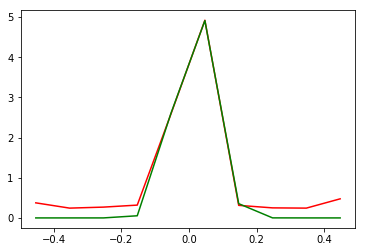

In [47]:
import numpy
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define some test data which is close to Gaussian
data = NormalizationToNeg(preds[5])
# data = NormalizationToNeg(voting2(preds[5]))
hist, bin_edges = numpy.histogram(data, density=True)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

# Define model function to be used to fit to the data above:
# Adapt it to as many gaussians you may want
# by copying the function with different A2,mu2,sigma2 parameters
def gauss(x, *p):
    A, mu, sigma = p
    return A*numpy.exp(-(x-mu)**2/(2.*sigma**2))

# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
p0 = [1., 0., 1.]

coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)

# Get the fitted curve
hist_fit = gauss(bin_centres, *coeff)

plt.plot(bin_centres, hist, label='Test data',color = 'red')
plt.plot(bin_centres, hist_fit, label='Fitted data',color ='green')

# #Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
# print 'Fitted mean = ', coeff[1]
# print 'Fitted standard deviation = ', coeff[2]

plt.show()

[27.25974101 44.90474796  0.16704661]


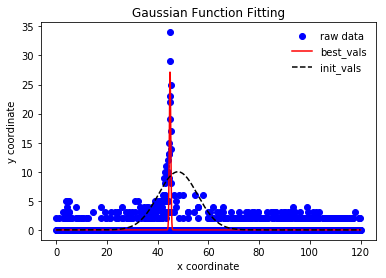

In [169]:
 #Header
import numpy 
import matplotlib.pyplot as plt
from numpy import exp, linspace, random
from scipy.optimize import curve_fit

#Define the Gaussian function
def gaussian(x, amp, cen, wid):
    return amp * exp(-(x-cen)**2 / wid)

def gaussian2(x, *p):
    A1, mu1, sigma1, A2, mu2, sigma2 = p
    return A1*numpy.exp(-(x-mu1)**2/(2.*sigma1**2)) + A2*numpy.exp(-(x-mu2)**2/(2.*sigma2**2))

#Create the data to be fitted

y = voting(preds[69])
x = linspace(0, 120, len(y))
# y = gaussian(x, 2.33, 2.21, 1.51) + random.normal(0, 0.2, len(x))+ gaussian(x, 3, -2.41, 1)
# np.savetxt ('data.dat',[x,y])  #[x,y] is is saved as a matrix of 2 lines

#Set the initial(init) values of parameters need to optimize(best)
init_vals = [10., -400., 10.,10., -500, 10.] # for [amp, cen, wid]
init_vals = [10., 48., 120.]
#Define the optimized values of parameters
best_vals, covar = curve_fit(gaussian, x, y, p0=init_vals)
print(best_vals) # output: array [2.27317256  0.20682276  1.64512305]

#Plot the curve with initial parameters and optimized parameters
y1 = gaussian(x, *best_vals) #best_vals, '*'is used to read-out the values in the array
y2 = gaussian(x, *init_vals) #init_vals


# y1 = gaussian2(x, *best_vals)
# y2 = gauss(x, *pg2)

plt.plot(x, y, 'bo',label='raw data')
plt.plot(x, y1, 'r-',label='best_vals')
plt.plot(x, y2, 'k--',label='init_vals')
#plt.show()

#Labels
plt.title("Gaussian Function Fitting")
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.legend()
leg = plt.legend()  # remove the frame of Legend, personal choice
leg.get_frame().set_linewidth(0.0) # remove the frame of Legend, personal choice
#leg.get_frame().set_edgecolor('b') # change the color of Legend frame
plt.show()

#Export figure
#plt.savefig('fit2.eps', format='eps', dpi=1000)
# plt.savefig('fit2.pdf', format='pdf', dpi=1000, figsize=(8, 6), facecolor='w', edgecolor='k')
# plt.savefig('fit2.jpg', format='jpg', dpi=1000, figsize=(8, 6), facecolor='w', edgecolor='k')

In [163]:
model.load_weights('convert_ep004-loss0.067-val_loss0.082.h5')

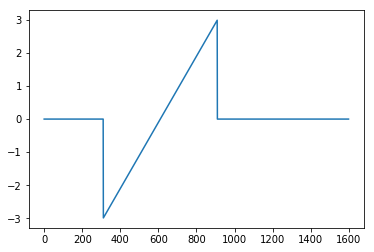

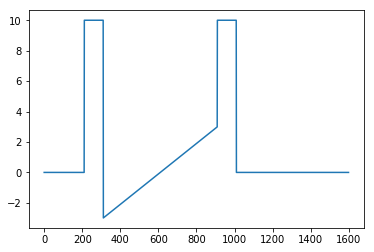

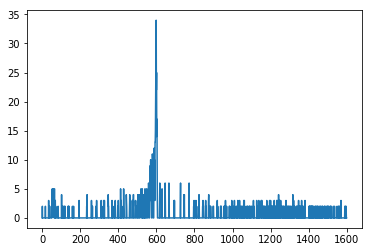

In [170]:
preds = model.predict(testX)
testAns = []
testTrue =[]
testT = testY1*testMask
# for i in range(len(testX)):
#     temp0 = voting(preds[i])
#     index, value = max(enumerate(temp0), key=operator.itemgetter(1))
#     testAns.append(index)
#     temp1 = voting(testT[i])
#     index, value = max(enumerate(temp1), key=operator.itemgetter(1))
#     testTrue.append(index)
# testAns = Normalization(testAns)
# testTrue = Normalization(testTrue)
# plt.plot(np.sort(testAns),np.sort(testTrue),'ro')
# x = np.linspace(0, 1, 1000)
# y=x
# plt.plot(x,y)
# plt.show()
plt.plot(testT[69])
plt.show()
plt.plot(testY1[69])
plt.show()

plt.plot(voting(preds[69]))
plt.show()

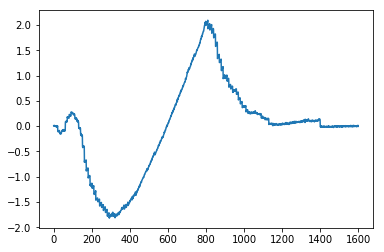

In [171]:
plt.plot(preds[69])
plt.show()

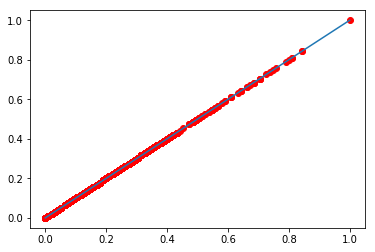

In [173]:
plt.plot(np.sort(testTrue),np.sort(testTrue),'ro')
x = np.linspace(0, 1, 1000)
y=x
plt.plot(x,y)